In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pingouin as pg
import seaborn as sns
plt.style.use('ggplot')

In [9]:

overall_data = pd.read_excel('~/github/gal/Analyzing-Medicare-Expansion/data2/All States All Data Collected.xlsx')
overall_data.head()

,State,code,Medicare Expansion Adoption,% overweight or obese,% Physical Activity,% Adults with Diabetes,% Adults who Smoke,"Heart Disease Death Rate per 100,000","Cancer Death Rate per 100,000","Stroke Death Rate per 100,000",...,Health Poor,Health Fair,Health Good,Health Very Good,Health Excellent,Excellent Mental Health (0 Poor days),Good Mental Health (1-4 Poor Days),Fair Mental Health (5-13 Days Poor),Bad Mental Health (14+ Days Poor),Poor Mental Health
0,Alabama,AL,Not Adopted,0.697,0.693,0.132,19.2,224.7,170.4,51.5,...,0.072,0.157,0.340,0.286,0.145,0.6168,0.1245,0.1030,0.1557,0.2587
1,Alaska,AK,Adopted,0.642,0.804,0.077,19.1,129.7,141.5,40.0,...,0.043,0.113,0.316,0.313,0.214,0.6462,0.1380,0.1063,0.1095,0.2158
2,Arizona,AZ,Adopted,0.647,0.779,0.097,14.0,136.4,131.9,31.0,...,0.050,0.144,0.315,0.304,0.187,0.6574,0.1227,0.0946,0.1253,0.2199
3,Arkansas,AR,Adopted,0.705,0.690,0.121,22.7,217.4,168.8,41.5,...,0.076,0.171,0.323,0.293,0.137,0.6058,0.1260,0.1082,0.1600,0.2682
4,California,CA,Adopted,0.622,0.790,0.097,11.2,139.7,135.0,37.0,...,0.041,0.140,0.330,0.304,0.185,0.6317,0.1460,0.1083,0.1139,0.2222


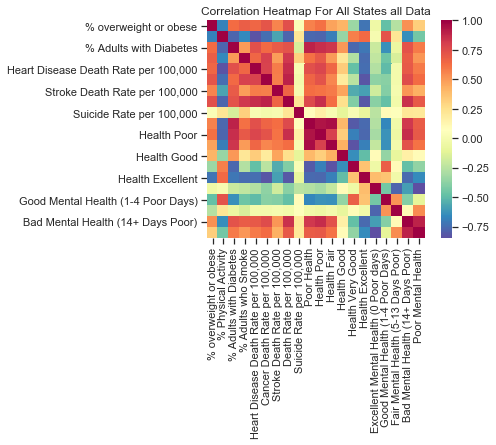

In [8]:
corrs = overall_data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', square=True)
plt.title('Correlation Heatmap Matrix')

plt.title('Correlation Heatmap For All States all Data')
plt.savefig('Heatmap_all_states_all_data.png')

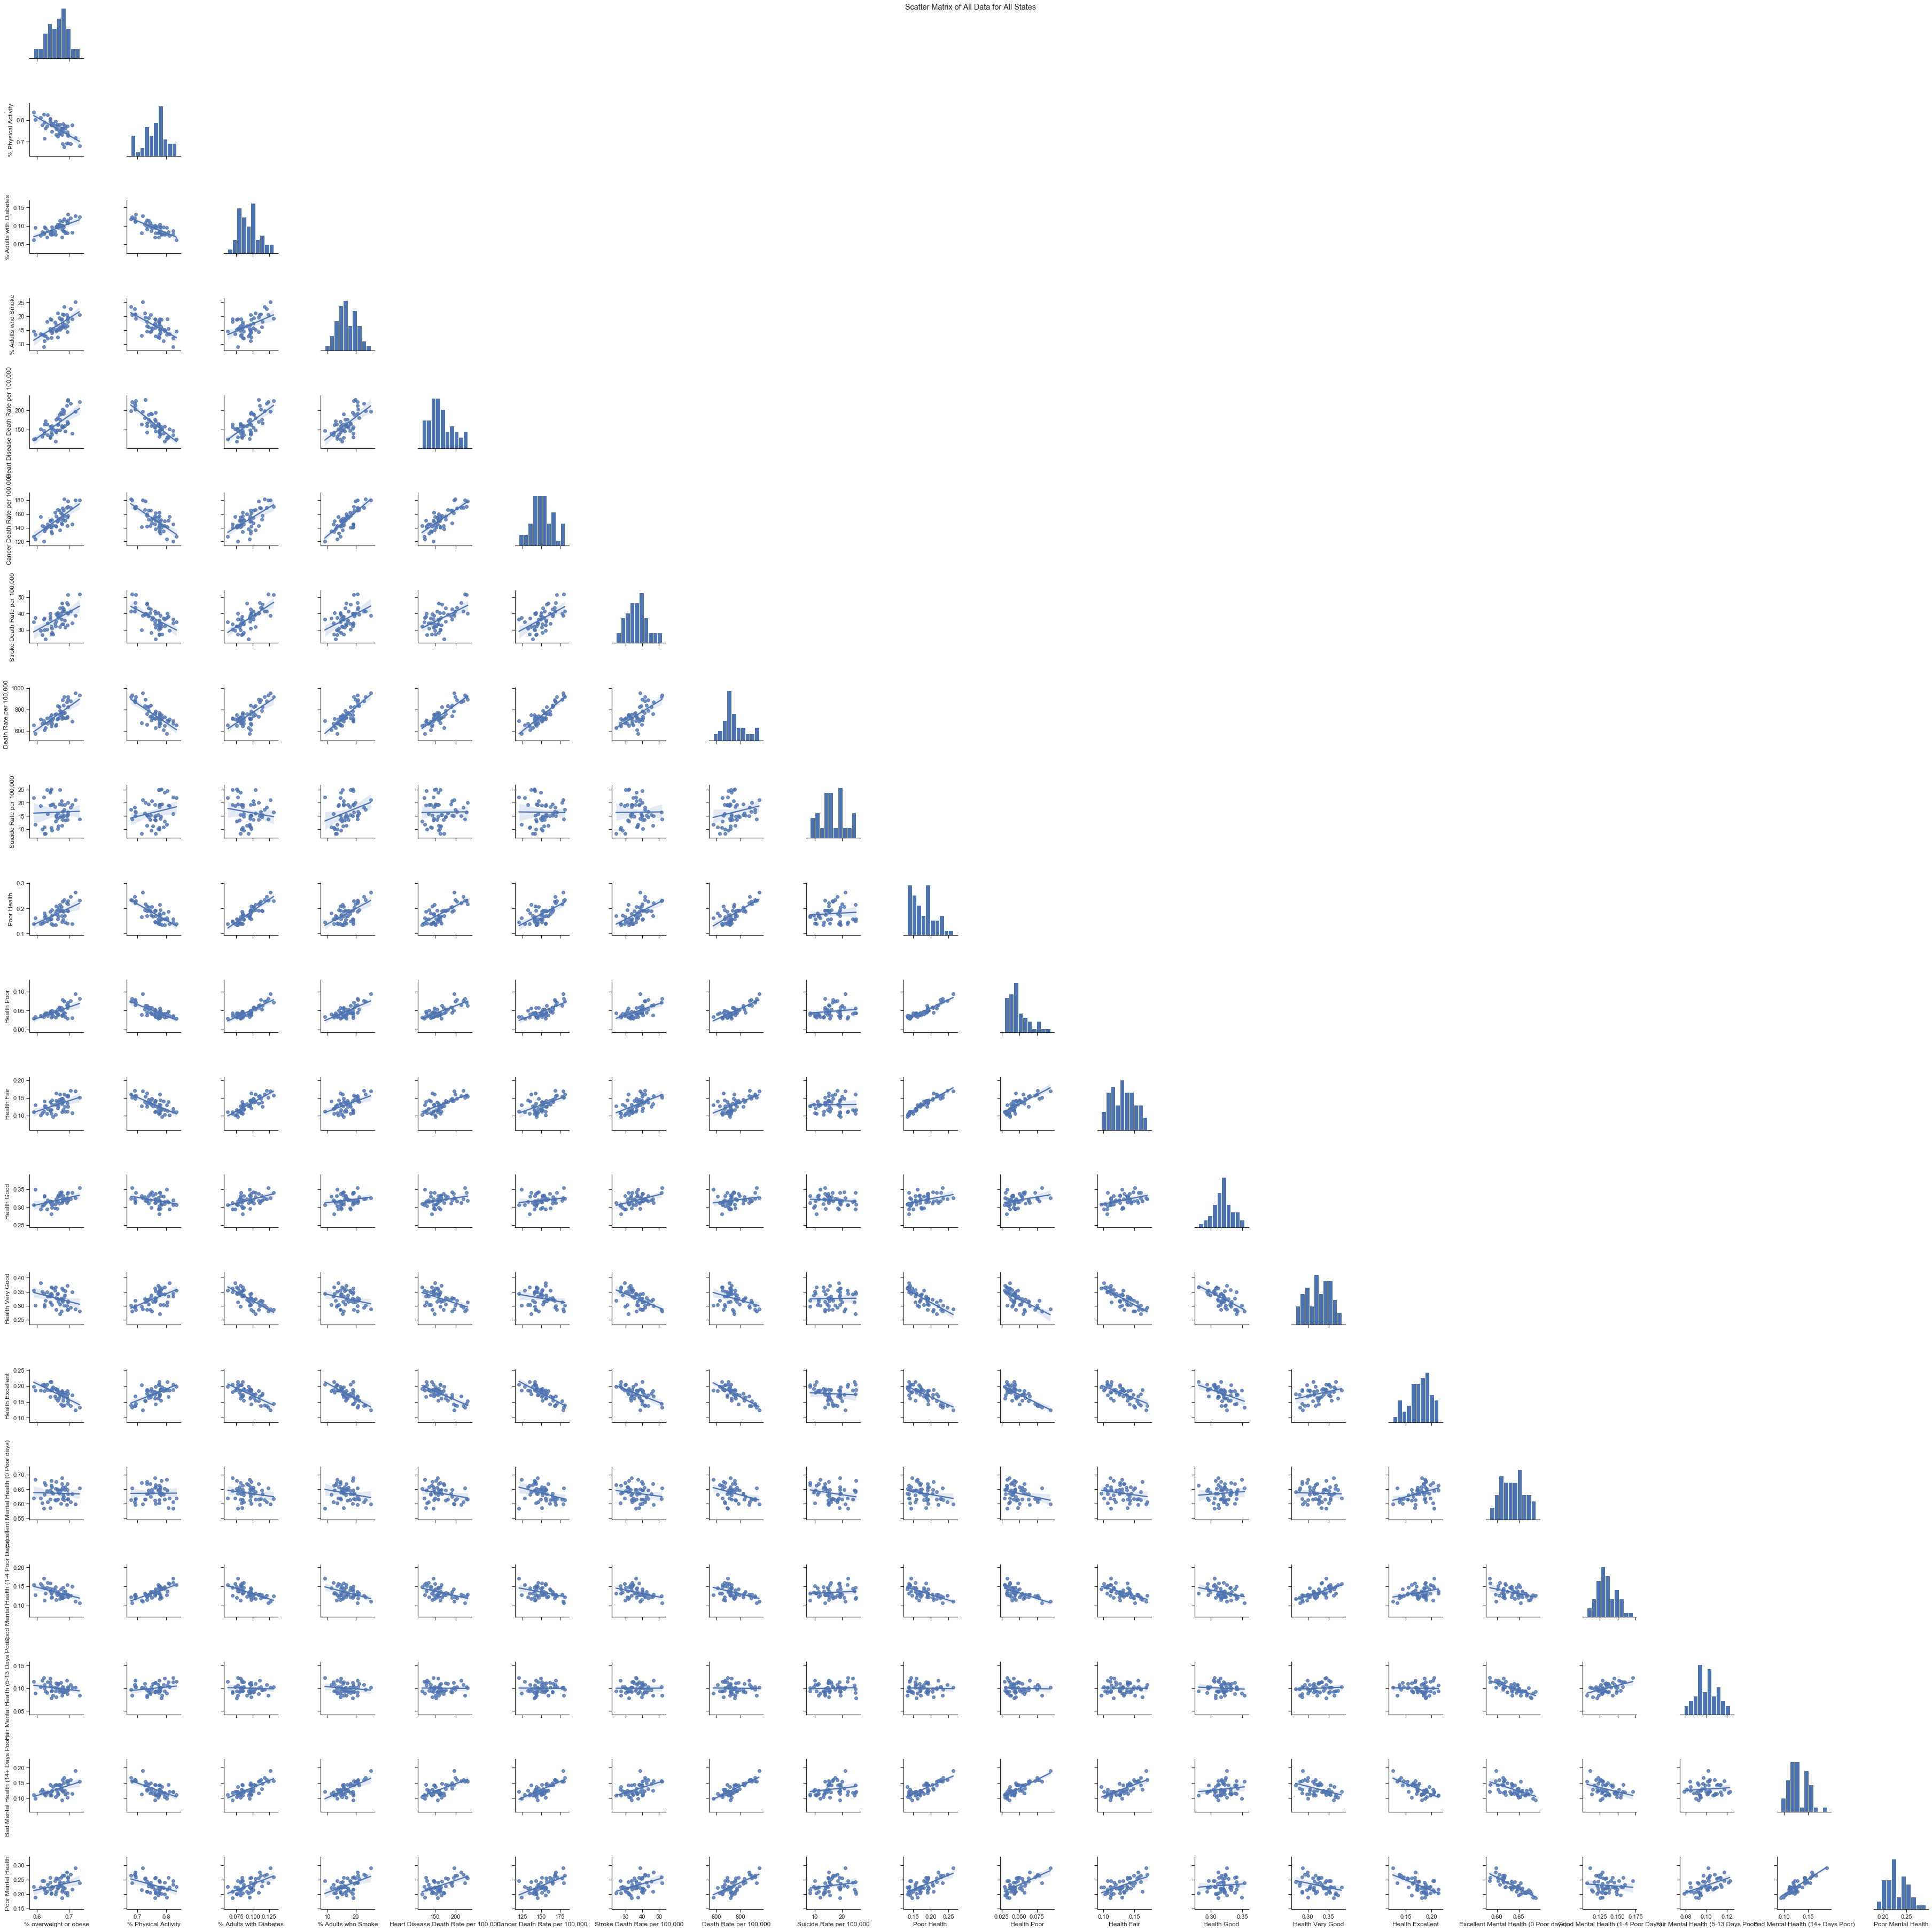

In [7]:
import seaborn as sns
sns.set(style="ticks")

g = sns.pairplot(overall_data, kind = 'reg', corner=True)
g.fig.suptitle("Scatter Matrix of All Data for All States", y=1)
plt.savefig('Scatter_Matrix_all_states_all_data.png')